### compare similarity of demux calls

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
projdir = '/u/project/cluo/terencew/igvf/pilot/multiome/'
donors = list(np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str))
samples = list(np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str))
samples = samples[:2]
s = samples[0]
gex_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos',
               'scsplit', 'scsplit_nogenos', 'souporcell',
               'souporcell_nogenos', 'demuxalot']
atac_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos', 
            'scsplit', 'scsplit_nogenos', 'souporcell',
       'souporcell_nogenos', 'scavengers']
overlap_methods = ['demuxlet', 'freemuxlet', 'vireo', 'vireo_nogenos', 'scsplit', 'scsplit_nogenos',
                   'souporcell', 'souporcell_nogenos']

In [3]:
vireo_gex = pd.read_csv(f'{projdir}/csv/demux/gex/vireo.csv', sep='\t', header=0, index_col=0)
vireo_atac = pd.read_csv(f'{projdir}/csv/demux/atac/vireo.csv', sep='\t', header=0, index_col=0)

In [4]:
# f = ['20220928-IGVF-D0', '20220928-IGVF-D7']
# tmp_vireo_gex = vireo_gex[[x in f for x in vireo_gex['t']]][['t', 'n_vars']]
# ax = sns.boxplot(tmp_vireo_gex, x='t', y='n_vars')
# ax.grid(False)

# ax.set_xlabel('')
# ax.set_ylabel('Number of variants')
# ax.set_ylim(0, 10000)

(0.0, 10000.0)

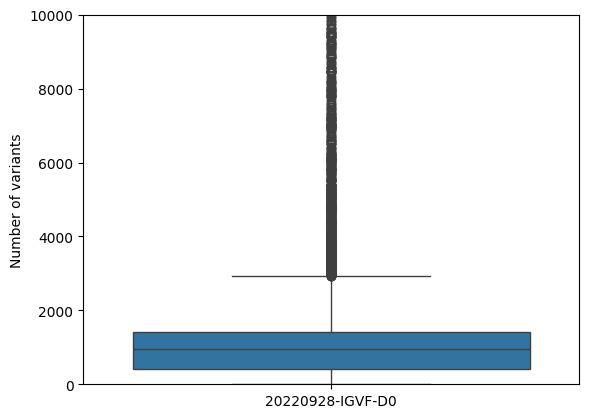

In [5]:
f = ['20220928-IGVF-D0', '20220928-IGVF-D7']
tmp_vireo_atac = vireo_atac[[x in f for x in vireo_atac['t']]][['t', 'n_vars']]
ax = sns.boxplot(data=tmp_vireo_atac, x='t', y='n_vars')
ax.grid(False)

ax.set_xlabel('')
ax.set_ylabel('Number of variants')
ax.set_ylim(0, 10000)

In [6]:
# ### write to a file for ggplot
# inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
# inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)

# inter_gex.rename(columns={'known_souporcell' : 'souporcell', 'souporcell' : 'souporcell_nogenos'}, inplace=True)
# inter_atac.rename(columns={'known_souporcell' : 'souporcell', 'souporcell' : 'souporcell_nogenos'}, inplace=True)

# inter_gex.drop(columns=['ambimux'], inplace=True)
# inter_atac.drop(columns=['ambimux'], inplace=True)

# gex_majority = inter_gex.mode(axis=1)[0]
# atac_majority = inter_atac.mode(axis=1)[0]

# inter_gex.replace({'unassigned' : 0, 'doublet' : 0,
#                    '25_A4' : 1, '26_A10' : 1, '27_C4' : 1, '48_V3' : 1}, inplace=True)
# inter_atac.replace({'unassigned' : 0, 'doublet' : 0,
#                    '25_A4' : 1, '26_A10' : 1, '27_C4' : 1, '48_V3' : 1}, inplace=True)

# inter_gex['majority'] = gex_majority
# inter_atac['majority'] = atac_majority
# inter_gex.to_csv(f'{projdir}/csv/final_figures/figure4/status_gex.csv', sep='\t', header=True, index=True)
# inter_atac.to_csv(f'{projdir}/csv/final_figures/figure4/status_atac.csv', sep='\t', header=True, index=True)

In [7]:
# inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
# inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)

# inter_gex['sample'] = [x.split('_')[1] for x in inter_gex.index]
# inter_atac['sample'] = [x.split('_')[1] for x in inter_atac.index]
# n_drops = inter_gex.shape[0]


In [8]:
inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)

In [9]:
!ls -lt {projdir}/csv/demux/inter_gex.csv

-rw-r--r--. 1 terencew cluo 2953683 Apr  9 16:54 /u/project/cluo/terencew/igvf/pilot/multiome//csv/demux/inter_gex.csv


In [10]:
# inter_gex['majority'] = inter_gex.mode(axis=1)[0]
# inter_atac['majority'] = inter_atac.mode(axis=1)[0]

### start by getting distribution

In [11]:
singlet_gex = inter_gex.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'})
singlet_atac = inter_atac.replace({'doublet' : 'non_singlet',
                                'unassigned' : 'non_singlet'})

mask = singlet_gex != 'non_singlet'
singlet_gex[mask] = 'singlet'

mask = singlet_atac != 'non_singlet'
singlet_atac[mask] = 'singlet'
    
tmp_singlet_gex = singlet_gex.copy()
tmp_singlet_gex.replace({'non_singlet' : 0,
                         'singlet' : 1}, inplace=True)
    
tmp_singlet_atac = singlet_atac.copy()
tmp_singlet_atac.replace({'non_singlet' : 0,
                         'singlet' : 1}, inplace=True)
    
# tmp_singlet_gex.drop(columns=['sample'], inplace=True)
# tmp_singlet_atac.drop(columns=['sample'], inplace=True)

# tmp_singlet_gex.replace({'25_A4' : 1, '26_A10' : 1, '27_C4' : 1, '48_V3' : 1}, inplace=True)
# tmp_singlet_atac.replace({'25_A4' : 1, '26_A10' : 1, '27_C4' : 1, '48_V3' : 1}, inplace=True)
tmp_singlet_gex.to_csv(f'{projdir}/csv/demux/singlet_gex.csv', sep='\t', header=True, index=True)
tmp_singlet_atac.to_csv(f'{projdir}/csv/demux/singlet_atac.csv', sep='\t', header=True, index=True)
tmp_singlet_gex.columns = [f'gex_{x}' for x in tmp_singlet_gex.columns]
tmp_singlet_atac.columns = [f'atac_{x}' for x in tmp_singlet_atac.columns]
tmp_singlet_merged = pd.concat([tmp_singlet_gex, tmp_singlet_atac], axis=1)
tmp_singlet_merged.to_csv(f'{projdir}/csv/demux/singlet_merged.csv', sep='\t', header=True, index=True)

In [12]:
status_gex = inter_gex.copy()
status_atac = inter_atac.copy()

status_gex.replace({'doublet' : 'non_singlet',
                  'unassigned' : 'non_singlet'}, inplace=True)

status_atac.replace({'doublet' : 'non_singlet',
                  'unassigned' : 'non_singlet'}, inplace=True)

for i, donor in enumerate(donors):
    status_gex.replace({donor : f'donor{i+1}'}, inplace=True)
    status_atac.replace({donor : f'donor{i+1}'}, inplace=True)

tmp_status_gex = status_gex.copy()
tmp_status_atac = status_atac.copy()

tmp_status_gex.to_csv(f'{projdir}/csv/demux/status_gex.csv', sep='\t', header=True, index=True)
tmp_status_atac.to_csv(f'{projdir}/csv/demux/status_atac.csv', sep='\t', header=True, index=True)
tmp_status_gex.columns = [f'gex_{x}' for x in tmp_status_gex.columns]
tmp_status_atac.columns = [f'atac_{x}' for x in tmp_status_atac.columns]
tmp_status_merged = pd.concat([tmp_status_gex, tmp_status_atac], axis=1)
tmp_status_merged.to_csv(f'{projdir}/csv/demux/status_merged.csv', sep='\t', header=True, index=True)

In [13]:
tmp_gex = status_gex.melt()
tmp_atac = status_atac.melt()

In [14]:
tmp_gex['variable'].value_counts()

demuxlet              30497
freemuxlet            30497
vireo                 30497
vireo_nogenos         30497
souporcell            30497
souporcell_nogenos    30497
demuxalot             30497
scsplit               30497
scsplit_nogenos       30497
Name: variable, dtype: int64

/tmp/ipykernel_237528/393260482.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(gex_methods, rotation=45, fontsize=15)


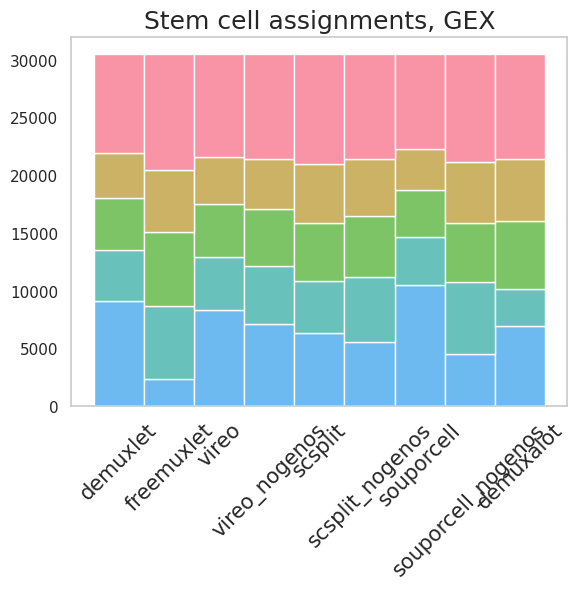

In [15]:
sns.set_theme(palette="husl", style='whitegrid')

plot_order = [f'donor{i}' for i in range(1,5)] + ['non_singlet']
ax = sns.histplot(data=tmp_gex, x='variable', hue='value', multiple='stack',hue_order=plot_order)
ax.set_title('Stem cell assignments, GEX', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(False)
ax.set_xticklabels(gex_methods, rotation=45, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend_.remove()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1., 1), title='donor')

/tmp/ipykernel_237528/1141163847.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(atac_methods, rotation=45, fontsize=15)


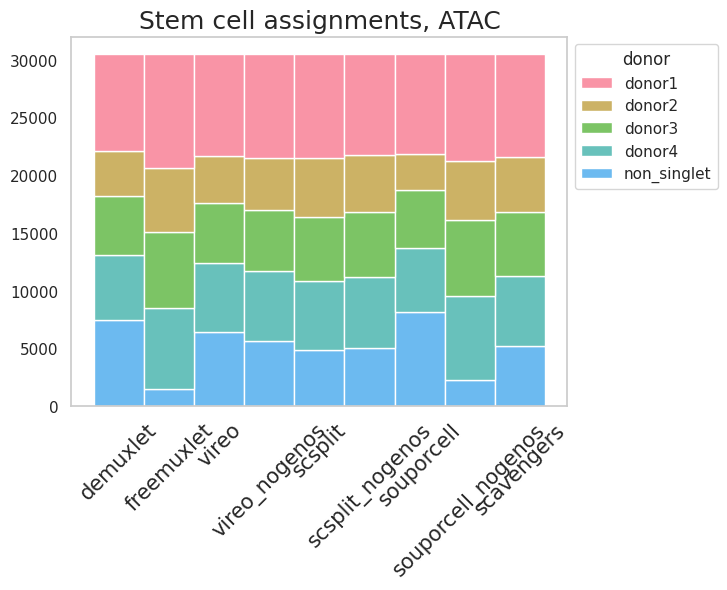

In [16]:
sns.set_theme(palette="husl", style='whitegrid')

plot_order = [f'donor{i}' for i in range(1,5)] + ['non_singlet']
ax = sns.histplot(data=tmp_atac, x='variable', hue='value', multiple='stack',hue_order=plot_order)
ax.set_title('Stem cell assignments, ATAC', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.grid(False)
ax.set_xticklabels(atac_methods, rotation=45, fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1., 1), title='donor')

In [17]:
tmp_gex.to_csv(f'{projdir}/csv/final_figures/figure4/figure_s7_gex_dist.csv', sep='\t', header=True, index=True)
tmp_atac.to_csv(f'{projdir}/csv/final_figures/figure4/figure_s7_atac_dist.csv', sep='\t', header=True, index=True)

### part B: Fraction of droplet identities

In [18]:
n_drops = singlet_gex.shape[0]
# gex_methods = singlet_gex.columns
all_overlap_gex = pd.DataFrame(columns=gex_methods)
for method1 in gex_methods:
    all_overlap_gex.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in gex_methods]
all_overlap_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
demuxlet,1.000000,0.758009,0.889891,0.870381,0.806374,0.755189,0.839001,0.837525,0.887792
freemuxlet,0.758009,1.000000,0.798078,0.834049,0.868807,0.793357,0.831131,0.872020,0.728236
vireo,0.889891,0.798078,1.000000,0.946257,0.846116,0.794472,0.898482,0.896350,0.915861
vireo_nogenos,0.870381,0.834049,0.946257,1.000000,0.866807,0.807358,0.906253,0.928386,0.875955
scsplit,0.806374,0.868807,0.846116,0.866807,1.000000,0.816080,0.843821,0.874873,0.791553
scsplit_nogenos,0.755189,0.793357,0.794472,0.807358,0.816080,1.000000,0.814670,0.816408,0.750861
souporcell,0.839001,0.831131,0.898482,0.906253,0.843821,0.814670,1.000000,0.903368,0.843067
souporcell_nogenos,0.837525,0.872020,0.896350,0.928386,0.874873,0.816408,0.903368,1.000000,0.828213
demuxalot,0.887792,0.728236,0.915861,0.875955,0.791553,0.750861,0.843067,0.828213,1.000000


In [19]:
n_drops = singlet_atac.shape[0]
all_overlap_atac = pd.DataFrame(columns=atac_methods)
for method1 in atac_methods:
    all_overlap_atac.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in atac_methods]
all_overlap_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,1.000000,0.800702,0.926157,0.909729,0.692691,0.784799,0.886186,0.890186,0.895563
freemuxlet,0.800702,1.000000,0.835066,0.860937,0.713939,0.890120,0.881529,0.877201,0.870118
vireo,0.926157,0.835066,1.000000,0.968685,0.697478,0.819622,0.936813,0.939109,0.945208
vireo_nogenos,0.909729,0.860937,0.968685,1.000000,0.699675,0.835853,0.954750,0.954553,0.961963
scsplit,0.692691,0.713939,0.697478,0.699675,1.000000,0.763419,0.695019,0.695150,0.705774
scsplit_nogenos,0.784799,0.890120,0.819622,0.835853,0.763419,1.000000,0.839066,0.840574,0.842673
souporcell,0.886186,0.881529,0.936813,0.954750,0.695019,0.839066,1.000000,0.960193,0.966620
souporcell_nogenos,0.890186,0.877201,0.939109,0.954553,0.695150,0.840574,0.960193,1.000000,0.957373
scavengers,0.895563,0.870118,0.945208,0.961963,0.705774,0.842673,0.966620,0.957373,1.000000


In [20]:
inter_gex = pd.read_csv(f'{projdir}/csv/demux/inter_gex.csv', sep='\t', header=0, index_col=0)
inter_atac = pd.read_csv(f'{projdir}/csv/demux/inter_atac.csv', sep='\t', header=0, index_col=0)
inter_gex['sample'] = [''.join(x.split('_')[1:]) for x in inter_gex.index]
inter_atac['sample'] = [''.join(x.split('_')[1:]) for x in inter_atac.index]

In [21]:
singlet_gex['sample'] = inter_gex['sample']
# gex_methods = singlet_gex.columns[:-1]
gex_overlap = []
for sample in samples:
    print(sample)
    tmp_gex = singlet_gex[singlet_gex['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_gex.shape[0]
    overlap = pd.DataFrame(columns=gex_methods)
    for method1 in gex_methods:
        overlap.loc[method1] = [np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops
                                for method2 in gex_methods]
    gex_overlap.append(overlap)
# all_overlap_gex.drop(columns=['sample'], inplace=True)
# all_overlap_gex = all_overlap_gex.iloc[:-1]

20220928-IGVF-D0
20220928-IGVF-D3


In [22]:
singlet_atac['sample'] = inter_atac['sample']
atac_overlap = []
for sample in samples:
    print(sample)
    tmp_atac = singlet_atac[singlet_atac['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_atac.shape[0]
    overlap = pd.DataFrame(columns=atac_methods)
    for method1 in atac_methods:
        overlap.loc[method1] = [np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops
                                for method2 in atac_methods]
    atac_overlap.append(overlap)

20220928-IGVF-D0
20220928-IGVF-D3


Text(0.5, 0.98, 'Stem cell dataset')

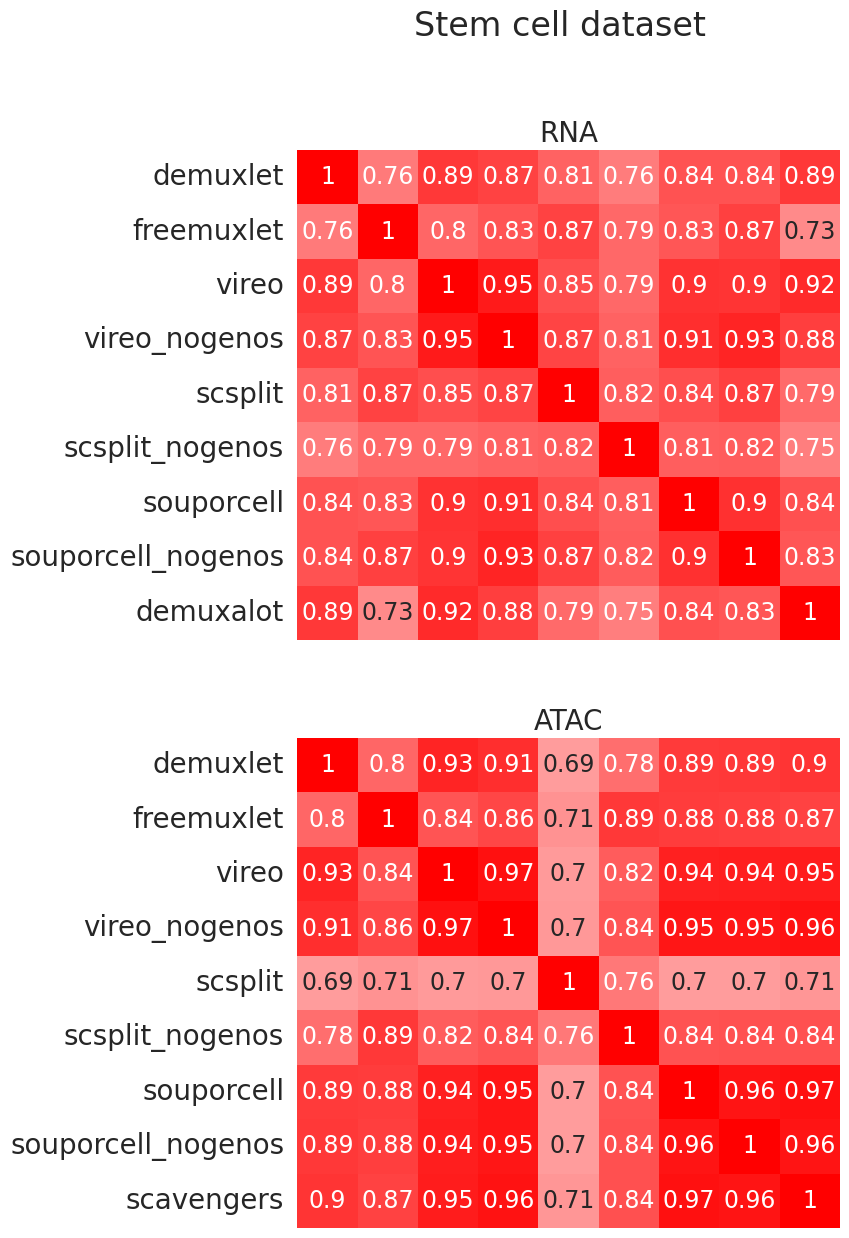

In [23]:
# sns.set(font_scale = 1)
fig, axes = plt.subplots(2, 1, figsize=(7, 14))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.4)

sns.heatmap(all_overlap_gex, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[0])
sns.heatmap(all_overlap_atac, annot=True, xticklabels='', vmin=0, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[1])

axes[0].set_title('RNA', fontsize=20)
axes[1].set_title('ATAC', fontsize=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 20)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize = 20)

fig.suptitle('Stem cell dataset', fontsize=24)

In [24]:
all_overlap_gex.to_csv(f'{projdir}/csv/final_figures/figure4/igvf_overlap_gex.csv',
                       sep='\t', header=True, index=True)
all_overlap_atac.to_csv(f'{projdir}/csv/final_figures/figure4/igvf_overlap_atac.csv',
                       sep='\t', header=True, index=True)

### status_atac

In [26]:
all_donor_gex = pd.DataFrame(columns=gex_methods, index=gex_methods)
for method1 in gex_methods:
    mask1 = status_gex[method1] != 'non_singlet'
    tmp_gex = status_gex[mask1]
    for method2 in gex_methods:
        mask2 = tmp_gex[method2] != 'non_singlet'
        tmp_gex = tmp_gex[mask2]
        n_drops = tmp_gex.shape[0]
        all_donor_gex.loc[method1,method2] = float(np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops)
all_donor_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,demuxalot
demuxlet,1.0,0.980806,0.995419,0.996202,0.993565,0.994663,0.996856,0.996855,0.997767
freemuxlet,0.980806,1.0,0.999253,0.9998,0.997185,0.998054,1.0,1.0,1.0
vireo,0.995077,0.999253,1.0,1.0,0.997235,0.99811,1.0,1.0,1.0
vireo_nogenos,0.992795,0.999362,1.0,1.0,0.997235,0.99811,1.0,1.0,1.0
scsplit,0.978632,0.989664,0.996941,0.997235,1.0,0.996164,0.99753,0.997585,0.999295
scsplit_nogenos,0.983099,0.991907,0.997903,0.998007,0.996164,1.0,0.998765,0.998821,0.999471
souporcell,0.991633,0.998467,1.0,1.0,0.997352,0.998765,1.0,1.0,1.0
souporcell_nogenos,0.987629,0.998253,0.99985,0.99995,0.997233,0.998387,1.0,1.0,1.0
demuxalot,0.996734,0.999262,1.0,1.0,0.999311,0.999357,1.0,1.0,1.0


In [25]:
all_donor_atac = pd.DataFrame(columns=atac_methods, index=atac_methods)
for method1 in atac_methods:
    mask1 = status_atac[method1] != 'non_singlet'
    tmp_atac = status_atac[mask1]
    for method2 in atac_methods:
        mask2 = tmp_atac[method2] != 'non_singlet'
        tmp_atac = tmp_atac[mask2]
        n_drops = tmp_atac.shape[0]
        all_donor_atac.loc[method1,method2] = float(np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops)
all_donor_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,scsplit,scsplit_nogenos,souporcell,souporcell_nogenos,scavengers
demuxlet,1.0,0.98973,0.996428,0.996514,0.889089,0.998449,0.998906,0.998904,0.998903
freemuxlet,0.98973,1.0,0.999821,0.999821,0.890047,0.999655,1.0,1.0,1.0
vireo,0.99643,0.999821,1.0,0.999955,0.890104,0.999655,1.0,1.0,1.0
vireo_nogenos,0.995439,0.999645,0.999955,1.0,0.890047,0.999598,0.999942,0.999942,0.999942
scsplit,0.884282,0.885432,0.890091,0.890047,1.0,0.890708,0.89093,0.891549,0.891525
scsplit_nogenos,0.989881,0.995247,0.999268,0.999268,0.890708,1.0,0.999654,0.999712,0.999711
souporcell,0.994818,0.999291,1.0,0.999955,0.890496,0.999654,1.0,1.0,1.0
souporcell_nogenos,0.994288,0.999468,1.0,0.999955,0.890705,0.999712,1.0,1.0,1.0
scavengers,0.995564,0.999645,1.0,0.999955,0.890332,0.999655,1.0,1.0,1.0


Text(0.5, 0.98, 'Stem cell dataset')

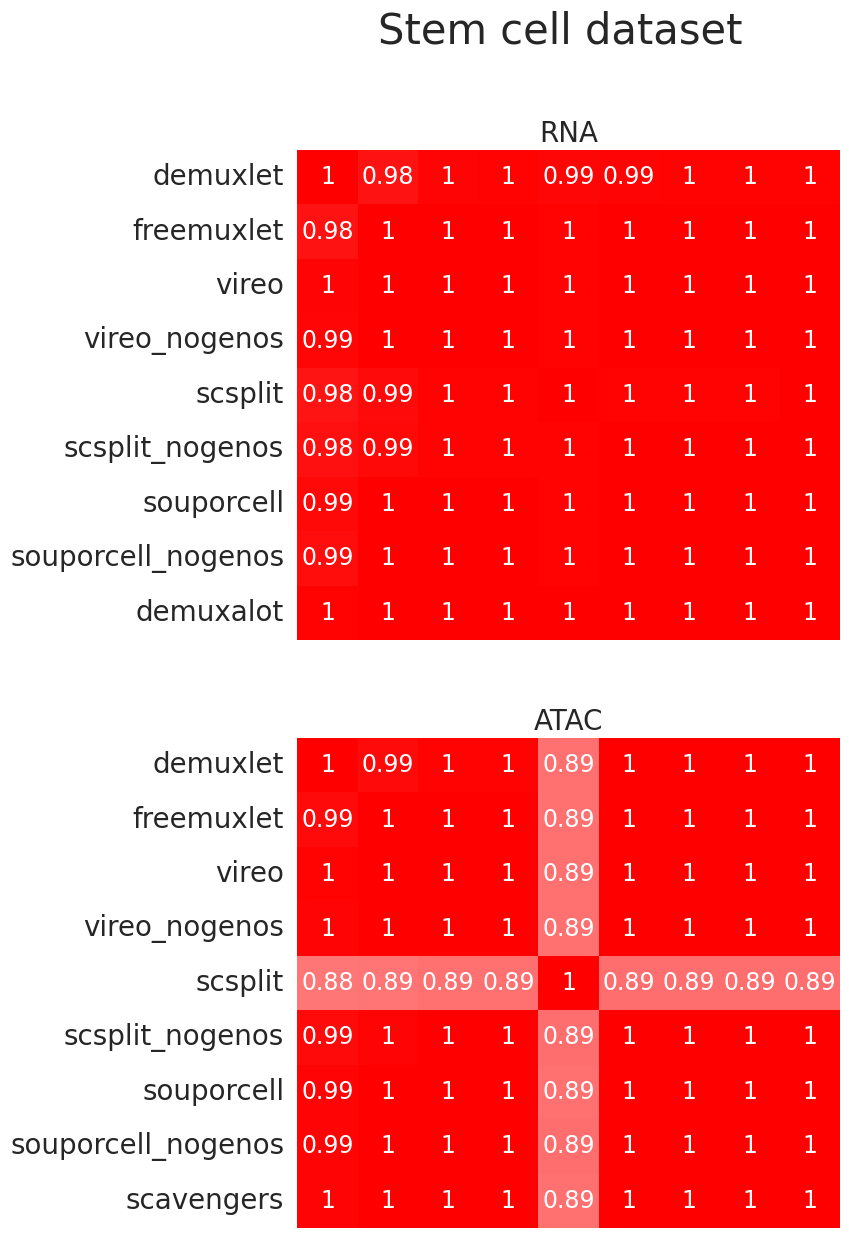

In [27]:
# sns.set(font_scale = 1)
fig, axes = plt.subplots(2, 1, figsize=(7, 14))  # 2 rows, 4 columns
plt.subplots_adjust(wspace=0.4)

all_donor_gex = all_donor_gex.astype(float)
all_donor_atac = all_donor_atac.astype(float)

sns.heatmap(all_donor_gex, annot=True, xticklabels='', vmin=0.5, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[0])

sns.heatmap(all_donor_atac, annot=True, xticklabels='', vmin=0.5, vmax=1, cmap='bwr',
            annot_kws={'size': 17}, cbar=False, ax = axes[1])
axes[0].set_title('RNA', fontsize=20)
axes[1].set_title('ATAC', fontsize=20)

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize = 20)
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize = 20)

fig.suptitle('Stem cell dataset', fontsize=30)

In [32]:
all_donor_gex.to_csv(f'{projdir}/csv/final_figures/figure4/igvf_donor_gex.csv',
                       sep='\t', header=True, index=True)
all_donor_atac.to_csv(f'{projdir}/csv/final_figures/figure4/igvf_donor_atac.csv',
                       sep='\t', header=True, index=True)

In [28]:
# ### gex

# fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # 2 rows, 4 columns
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
# for i, ax in enumerate(axes.flat):
#     if i < 2:
#         sample = samples[i]
#         to_plot = gex_overlap[i]
#         sns.heatmap(to_plot, annot=True, xticklabels='',vmin=0, vmax=1, cmap='bwr', cbar=False, ax=ax)
#         ax.set_title(sample)
# #         ax.legend_.remove()
#     else:
#         ax.remove()

In [29]:
# n_drops = status_gex.shape[0]
# singlets = pd.DataFrame(columns=['singlet_rate'])
# for method in status_gex.columns:
#     singlets.loc[method] = (n_drops - np.sum(status_gex[method] == 'non_singlet')) / n_drops
# singlets

In [30]:
n_drops = status_gex.shape[0]
# singlets = pd.DataFrame(columns=samples)
[(n_drops - np.sum(status_gex[method] == 'non_singlet')) / n_drops for method in status_gex.columns]

[0.7019706856412106,
 0.9237629930812867,
 0.7268911696232416,
 0.7656162901268977,
 0.7914876873135063,
 0.8175558251631307,
 0.6552775682854052,
 0.851264058759878,
 0.7728629045479883]

In [31]:
n_drops = status_atac.shape[0]
singlets = pd.DataFrame(columns=['singlet_rate'])
for method in status_atac.columns:
    singlets.loc[method] = (n_drops - np.sum(status_atac[method] == 'non_singlet')) / n_drops
singlets

,singlet_rate
demuxlet,0.754927
freemuxlet,0.951339
vireo,0.788504
vireo_nogenos,0.816211
souporcell,0.839689
souporcell_nogenos,0.835885
scsplit,0.734007
scsplit_nogenos,0.924943
scavengers,0.827950


In [37]:
inter_atac

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,scsplit,scsplit_nogenos,scavengers,sample
AAACAGCCAAGGTATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,20220928-IGVF-D0
AAACAGCCAATGCGCT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D0
AAACAGCCAGCAAATA-1_20220928-IGVF-D0,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,27_C4,20220928-IGVF-D0
AAACAGCCATTGTGAT-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D0
AAACATGCAAACATAG-1_20220928-IGVF-D0,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D0
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTCCAGGG-1_20220928-IGVF-D3,doublet,48_V3,doublet,doublet,26_A10,doublet,doublet,26_A10,26_A10,20220928-IGVF-D3
TTTGTTGGTTCCTGTG-1_20220928-IGVF-D3,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D3
TTTGTTGGTTGCCTCA-1_20220928-IGVF-D3,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D3
TTTGTTGGTTGGATAT-1_20220928-IGVF-D3,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,25_A4,20220928-IGVF-D3


### compare fraction overlap

In [38]:
singlet_gex['sample'] = inter_gex['sample']
singlet_atac['sample'] = inter_atac['sample']
n_entries = len(overlap_methods)
n_drops = singlet_gex.shape[0]
compare = pd.DataFrame(columns=['RNA', 'ATAC'])
gex_new_overlap = pd.DataFrame(columns=overlap_methods)
atac_new_overlap = pd.DataFrame(columns=overlap_methods)
for method1 in overlap_methods:
    atac_new_overlap.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    gex_new_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in overlap_methods]
compare['RNA'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['method'] = overlap_methods
compare

,RNA,ATAC,method
demuxlet,0.822338,0.841493,demuxlet
freemuxlet,0.822207,0.837071,freemuxlet
vireo,0.867092,0.874704,vireo
vireo_nogenos,0.879927,0.883455,vireo_nogenos
scsplit,0.846125,0.708196,scsplit
scsplit_nogenos,0.799648,0.824779,scsplit_nogenos
souporcell,0.862389,0.879079,souporcell
souporcell_nogenos,0.875562,0.879567,souporcell_nogenos


In [39]:
sns.set_theme(palette="husl", style='whitegrid')
tmp_compare = compare.melt(id_vars='method')
tmp_compare.columns = ['method', 'modality', 'frac_overlap']
ax = sns.barplot(tmp_compare, x='method', y='frac_overlap', hue='modality')
ax.set_title('Stem cell dataset', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend_.remove()
ax.grid(False)
ax.set_xlabel('')
ax.set_ylabel('Mean overlap with other methods')

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret input 'frac_overlap'

In [40]:
singlet_gex.shape

(30497, 10)

In [41]:
status_gex['sample'] = inter_gex['sample']
status_atac['sample'] = inter_atac['sample']
frac_same_droplets = []
n_entries = len(overlap_methods)
# compare = pd.DataFrame(columns=['GEX', 'ATAC'])
for sample in samples:
    compare = pd.DataFrame()
    print(sample)
    tmp_atac = status_atac[status_atac['sample'] == sample].drop(columns=['sample'])
    tmp_gex = status_gex[status_gex['sample'] == sample].drop(columns=['sample'])
    n_drops = tmp_atac.shape[0]
    gex_new_overlap = pd.DataFrame(columns=overlap_methods)
    atac_new_overlap = pd.DataFrame(columns=overlap_methods)
    for method1 in overlap_methods:
        atac_new_overlap.loc[method1] = [np.sum(tmp_atac[method1] == tmp_atac[method2]) / n_drops
                                for method2 in overlap_methods]
        gex_new_overlap.loc[method1] = [np.sum(tmp_gex[method1] == tmp_gex[method2]) / n_drops
                                for method2 in overlap_methods]
    compare['GEX'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
    compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
    compare['method'] = overlap_methods
    frac_same_droplets.append(compare)

20220928-IGVF-D0
20220928-IGVF-D3


In [42]:
gex_fracs = np.vstack([x.iloc[:,0] for x in frac_same_droplets])
atac_fracs = np.vstack([x.iloc[:,1] for x in frac_same_droplets])
gex_fracs, atac_fracs

(array([[0.80942342, 0.79766297, 0.85157132, 0.85797106, 0.8109443 ,
         0.64318089, 0.83017362, 0.8519026 ],
        [0.81567961, 0.81257904, 0.87141497, 0.88567349, 0.83515333,
         0.85060855, 0.87012987, 0.87834365]]),
 array([[0.86836122, 0.8197684 , 0.90463642, 0.90704573, 0.77358491,
         0.88619012, 0.89112921, 0.89755907],
        [0.80912491, 0.81095397, 0.84579452, 0.8552322 , 0.54858911,
         0.75879513, 0.85294758, 0.85202285]]))

In [43]:
gex_mean = np.mean(gex_fracs, axis=0)
gex_var = np.var(gex_fracs, axis=0)
gex_mean, gex_var

(array([0.81255151, 0.80512101, 0.86149315, 0.87182227, 0.82304881,
        0.74689472, 0.85015175, 0.86512312]),
 array([9.78496840e-06, 5.56223355e-05, 9.84426044e-05, 1.91856166e-04,
        1.46519267e-04, 1.07565585e-02, 3.99125460e-04, 1.74782180e-04]))

In [44]:
# atac_mean = np.mean(atac_fracs, axis=0)
# atac_var = np.var(atac_fracs, axis=0)
# atac_mean, atac_var

In [45]:
# sns.set_theme(palette="Set2", style='whitegrid')
# fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # 2 rows, 4 columns
# plt.subplots_adjust(wspace=0.5, hspace=0.8)
# for i, ax in enumerate(axes.flat):
#     if i < 3:
#         sample = samples[i]
#         compare = frac_same_droplets[i].melt(id_vars='method')
#         compare.columns = ['method', 'modality', 'frac_overlap']
#         sns.barplot(compare, x='method', y='frac_overlap', hue='modality', ax=ax)
#         ax.set_title(sample)
#         ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# #         ax.legend_.remove()
#         ax.grid(False)
#         ax.set_xlabel('')
#     else:
#         ax.remove()

In [46]:
# sns.set_theme(palette="husl", style='whitegrid')
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 4 columns
# plt.subplots_adjust(wspace=0.2, hspace=0.8)
# for i, ax in enumerate(axes.flat):
#     if i < 3:
#         sample = samples[i]
#         compare = frac_same_droplets[i].melt(id_vars='method')
#         compare.columns = ['method', 'modality', 'frac_overlap']
#         sns.barplot(compare, x='method', y='frac_overlap', hue='modality', ax=ax)
#         ax.set_title(titles[i])
#         ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#         sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#         ax.legend_.remove()
#         ax.grid(False)
#         ax.set_xlabel('')
#     else:
#         ax.remove()

In [47]:
# sns.set_theme(palette="Set2", style='whitegrid')
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 4 columns
# plt.subplots_adjust(wspace=0.5, hspace=0.8)
# for i, ax in enumerate(axes.flat):
#     if i < 3:
#         sample = samples[i]
#         compare = frac_same_droplets[i].melt(id_vars='method')
#         compare.columns = ['method', 'modality', 'frac_overlap']
#         sns.barplot(compare, x='method', y='frac_overlap', hue='modality', ax=ax)
#         ax.set_title(sample)
#         ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#         ax.legend_.remove()
#         ax.grid(False)
#         ax.set_xlabel('')
#     else:
#         ax.remove()

### cross modality

In [48]:
n_entries = len(overlap_methods)
n_drops = singlet_gex.shape[0]
compare = pd.DataFrame(columns=['GEX', 'ATAC'])
cross_overlap = pd.DataFrame(columns=overlap_methods)
gex_new_overlap = pd.DataFrame(columns=overlap_methods)
atac_new_overlap = pd.DataFrame(columns=overlap_methods)

for method1 in overlap_methods:
    cross_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    atac_new_overlap.loc[method1] = [np.sum(singlet_atac[method1] == singlet_atac[method2]) / n_drops
                            for method2 in overlap_methods]
    gex_new_overlap.loc[method1] = [np.sum(singlet_gex[method1] == singlet_gex[method2]) / n_drops
                            for method2 in overlap_methods]
    
compare['GEX'] = np.mean(gex_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['ATAC'] = np.mean(atac_new_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['cross'] = np.mean(cross_overlap.mask(np.eye(n_entries, dtype=bool)))
compare['method'] = overlap_methods

Text(0, 0.5, 'Mean overlap with other methods')

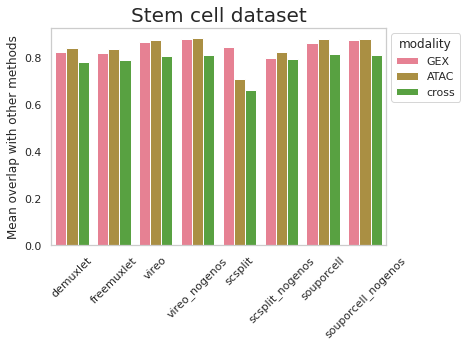

In [53]:
sns.set_theme(palette="husl", style='whitegrid')
tmp_compare = compare.melt(id_vars='method')
tmp_compare.columns = ['method', 'modality', 'frac_overlap']
ax = sns.barplot(data=tmp_compare, x='method', y='frac_overlap', hue='modality')
ax.set_title('Stem cell dataset', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# ax.legend_.remove()
ax.grid(False)
ax.set_xlabel('')
ax.set_ylabel('Mean overlap with other methods')

In [54]:
tmp_compare.to_csv(f'{projdir}/csv/final_figures/figure4/figure_4c_igvf_mean.csv', sep='\t', header=True, index=True)

### check variants

In [55]:
vireo_gex = pd.read_csv(f'{projdir}/csv/demux/gex/vireo.csv', sep='\t', index_col=0)
vireo_gex.shape[0]

30497

In [56]:
mask = np.array([x in donors for x in vireo_gex['donor_id']])
vireo_amb = vireo_gex[~mask]
vireo_sngs = vireo_gex[mask]
vireo_amb['type'] = ['unassigned/doublet'] * vireo_amb.shape[0]
vireo_sngs['type'] = ['singlet'] * vireo_sngs.shape[0]

/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/u/home/t/terencew/project-cluo/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='type', ylabel='n_vars'>

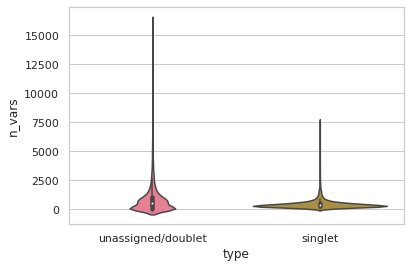

In [58]:
vireo_vars = pd.concat([vireo_amb[['n_vars', 'type']], vireo_sngs[['n_vars', 'type']]])
sns.violinplot(data=vireo_vars, x='type', y='n_vars')